In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
#load the dataset and vectorize it. Followed by splitting the data into training and validation set.
newsgroups_train = fetch_20newsgroups(subset='train')
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(newsgroups_train.data).todense()
y = newsgroups_train.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [4]:
#defined the model architecture
class NNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [5]:
#training and validation process
input_size = X_train.shape[1]
hidden_size = 128
output_size = len(np.unique(y_train))
learning_rate = 0.001
num_epochs = 50

model = NNModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0
    
    # Training
    model.train()
    optimizer.zero_grad()
    inputs = torch.Tensor(X_train).float()
    labels = torch.Tensor(y_train).long()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    _, predicted = torch.max(outputs, 1)
    train_acc += (predicted == labels).sum().item() / len(labels)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validation
    model.eval()
    inputs = torch.Tensor(X_val).float()
    labels = torch.Tensor(y_val).long()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    val_loss += loss.item()
    _, predicted = torch.max(outputs, 1)
    val_acc += (predicted == labels).sum().item() / len(labels)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    # Print progress
    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}, Train Acc: {:.4f}, Val Acc: {:.4f}'
              .format(epoch+1, num_epochs, train_loss, val_loss, train_acc, val_acc))



Epoch [10/50], Train Loss: 2.8752, Val Loss: 2.8833, Train Acc: 0.6485, Val Acc: 0.6138
Epoch [20/50], Train Loss: 2.6722, Val Loss: 2.6948, Train Acc: 0.7470, Val Acc: 0.7123
Epoch [30/50], Train Loss: 2.4970, Val Loss: 2.5333, Train Acc: 0.8116, Val Acc: 0.7693
Epoch [40/50], Train Loss: 2.3717, Val Loss: 2.4283, Train Acc: 0.8663, Val Acc: 0.8038
Epoch [50/50], Train Loss: 2.2904, Val Loss: 2.3656, Train Acc: 0.8923, Val Acc: 0.8246


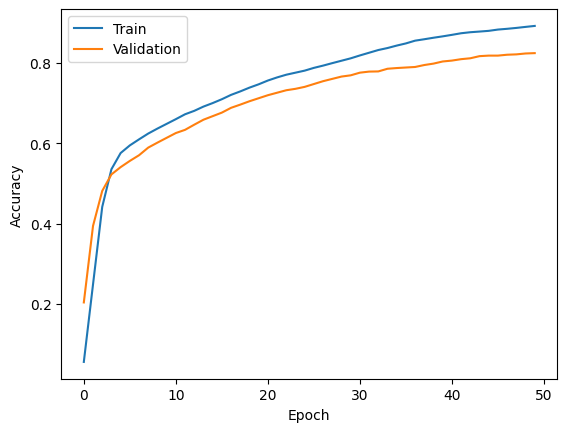

In [6]:
#plotting the training and validation accuracy
plt.plot(range(num_epochs), train_accs, label='Train')
plt.plot(range(num_epochs), val_accs, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()